In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import r2_score

In [5]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2022-10-22 05:36:03--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-10-22 05:36:03 (37.1 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



In [7]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv',index_col = 'Month',parse_dates = True,skipfooter=2)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 30.6 MB/s 
     |████████████████████████████████| 9.8 MB 53.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [12]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [11]:
df.columns = ['Sales']

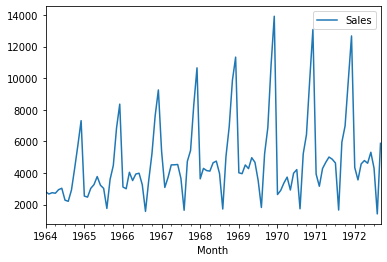

In [13]:
df.plot()

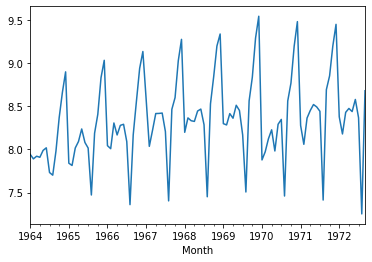

In [14]:
df['logsales'] = np.log(df['Sales'])
df['logsales'].plot()

In [15]:
df.index.freq = 'MS'

In [18]:
Ntest = 12
train = df.iloc[:-Ntest]
test  = df.iloc[-Ntest:]

In [19]:
train_index = df.index <= train.index[-1]
test_index = df.index > train.index[-1]

In [20]:
import pmdarima as pd


In [23]:
model = pd.auto_arima(train['logsales'],trace = True,suppress_warnings = True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.502, Time=1.05 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=0.60 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.36 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.21 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.53 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.23 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.122, Time=0.26 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.08 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [24]:
train_pred = model.predict_in_sample(start = 12,end =-1)
test_pred,conf_int = model.predict(n_periods = Ntest,return_conf_int=True)

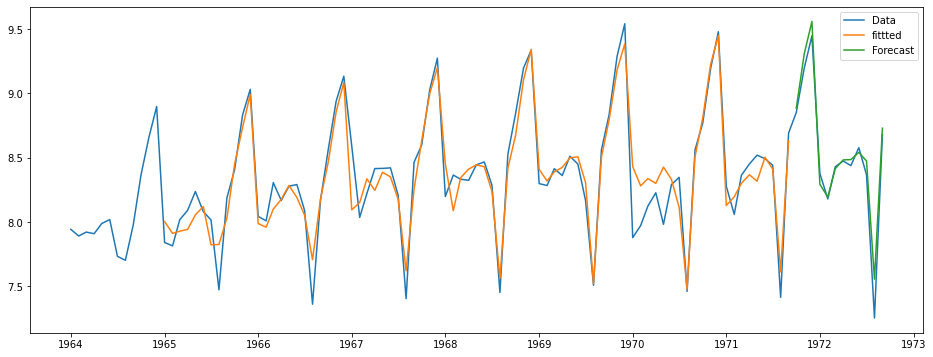

In [32]:
fig,ax = plt.subplots(figsize = (16,6))
ax.plot(df.index,df['logsales'],label = 'Data')
ax.plot(train.index[12:],train_pred,label ='fittted')
ax.plot(test.index,test_pred,label = 'Forecast')
ax.legend()

In [33]:
r2_score(test['Sales'],np.exp(test_pred))

0.9547049058792039

In [38]:
model2 = pd.auto_arima(train['logsales'],trace = True,seasonal=False,suppress_warnings = True,max_p = 12,max_q = 2,max_order = 14,
                       stepwise = False)

#stepwise = False is grid search , True is walkforward 

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.15 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.16 

In [39]:
train2_pred = model2.predict_in_sample(start = 12,end =-1)
test2_pred,conf_int = model2.predict(n_periods = Ntest,return_conf_int=True)

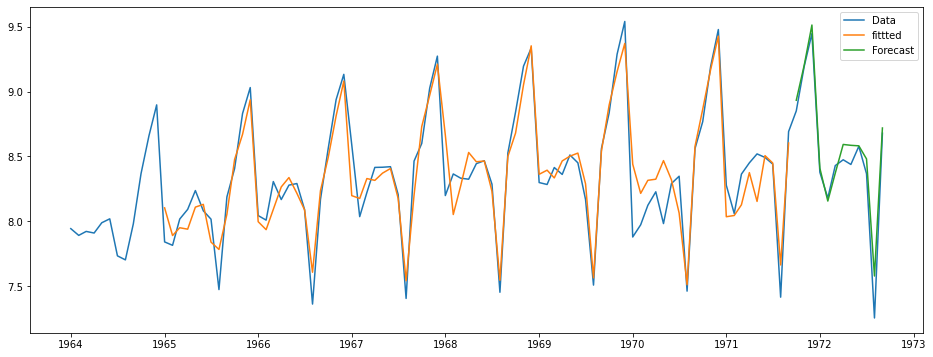

In [40]:
fig,ax = plt.subplots(figsize = (16,6))
ax.plot(df.index,df['logsales'],label = 'Data')
ax.plot(train.index[12:],train2_pred,label ='fittted')
ax.plot(test.index,test2_pred,label = 'Forecast')
ax.legend()

In [41]:
r2_score(test['Sales'],np.exp(test2_pred))

0.9719756855206847

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

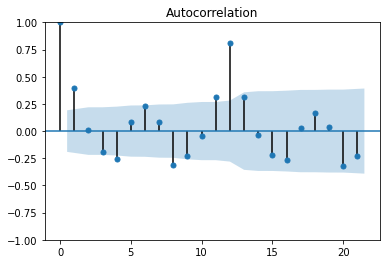

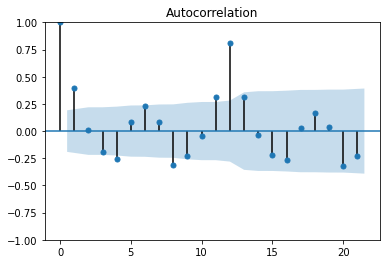

In [43]:
plot_acf(df['logsales'])

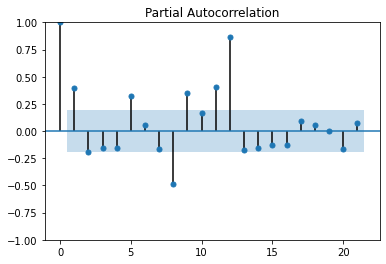

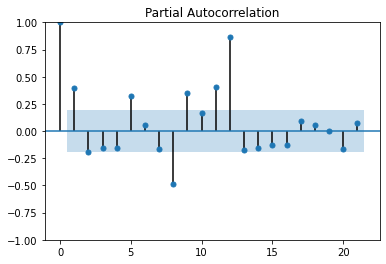

In [45]:
plot_pacf(df['logsales'],method='ols')

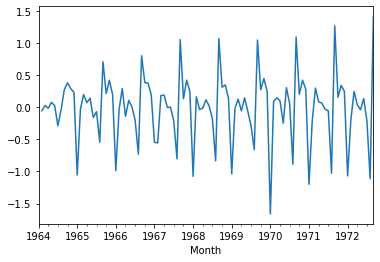

In [46]:
# our model choose d=1 that is first diff 
# lets see the plot for first deiff
df['logsales'].diff().plot()# we can see ther is a stationary in this 

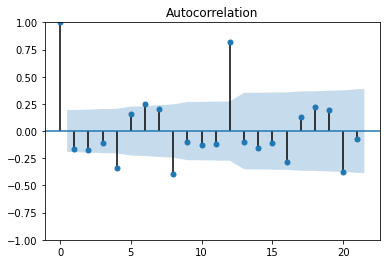

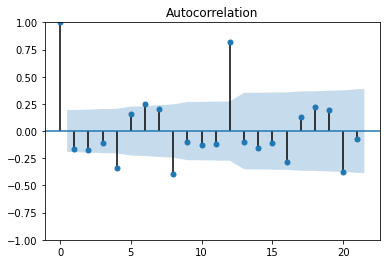

In [47]:
plot_acf(df['logsales'].diff().dropna())

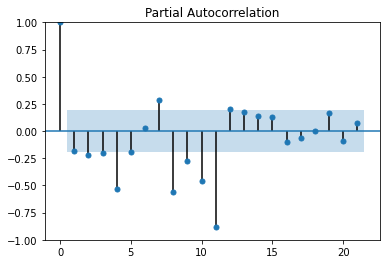

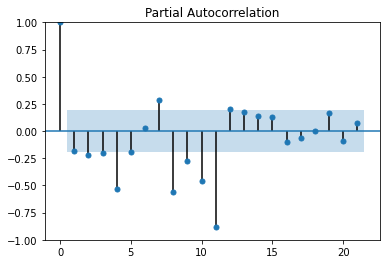

In [48]:
plot_pacf(df['logsales'].diff().dropna(),method = 'ols')

In [49]:
# doing the adfuller test
from statsmodels.tsa.stattools import adfuller

In [50]:
adfuller(df['logsales'])

(-2.2551186012844227,
 0.1868517311168746,
 13,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -49.19143751582993)

In [51]:
adfuller(df['logsales'].diff().dropna())# you can see the p-value in the diff part is very low , so we reject the null hypothesis

(-4.460914465253656,
 0.00023121404649533762,
 12,
 91,
 {'1%': -3.50434289821397,
  '5%': -2.8938659630479413,
  '10%': -2.5840147047458037},
 -43.63799632128641)

In [54]:
def plot_fit_and_forcast(result,d=0,col='Sales'):
  fig,ax = plt.subplots(figsize = (16,6))
  ax.plot(df[col],label = 'Data')

  train_pred = result.fittedvalues
  ax.plot(train.index[d:],train_pred[d:],color = 'green',label = 'Fitted')

  #forecast for test
  predicted_result = result.get_forecast(Ntest)
  conf_int = predicted_result.conf_int()
  lower,upper = conf_int[f"lower {col}"],conf_int[f'upper {col}']
  forecast = predicted_result.predicted_mean 
  ax.plot(test.index,forecast,label='Forecast')
  ax.legend()
  return forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


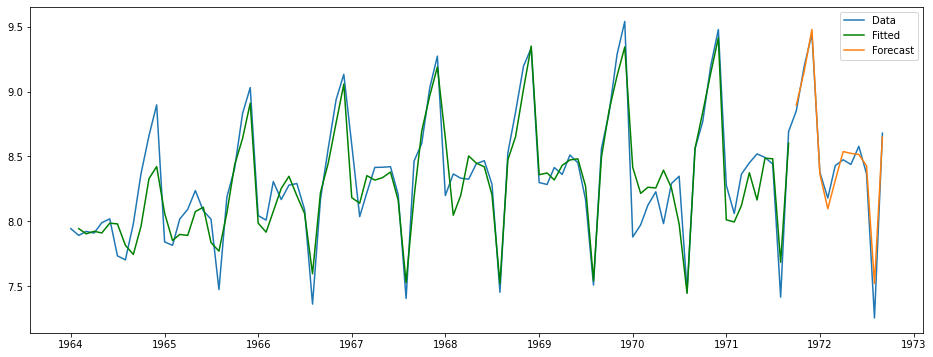

In [55]:
arima = ARIMA(train['logsales'],order = (12,1,2))
arima_result =  arima.fit()
forecast = plot_fit_and_forcast(arima_result,d=1,col='logsales')

In [56]:
r2_score(test['Sales'],np.exp(forecast))

0.9856623687570207